In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
df = pd.read_csv("./datasets/utrecht.csv")
df.head()

,Date,Time,Temperature_C,Dew_Point_C,Humidity_%,Wind,Wind_Speed_kmh,Wind_Gust_kmh,Pressure_hPa,Precip_Rate_mm,Condition
0,2015/10/01,11:25 PM,12.22,8.89,82.0,ENE,20.92,0.0,1034.54,0.0,Fair
1,2015/10/01,11:55 PM,12.22,8.89,82.0,ENE,20.92,0.0,1034.54,0.0,Fair
2,2015/10/01,12:25 AM,11.11,8.89,88.0,E,16.09,0.0,1034.54,0.0,Fair
3,2015/10/01,12:55 AM,11.11,8.89,88.0,ENE,12.87,0.0,1034.54,0.0,Fair
4,2015/10/01,01:25 AM,10.0,7.78,87.0,ENE,14.48,0.0,1033.53,0.0,Fair


In [23]:
df = pd.read_csv("./datasets/utrecht.csv")

cols = ["Temperature_C",
"Dew_Point_C",
"Humidity_%",
"Wind_Speed_kmh",
"Wind_Gust_kmh",
"Pressure_hPa",
"Precip_Rate_mm"]

# Convert to float
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

# Convert Wind and Condition to categorical
df["Wind"] = df["Wind"].astype("category")
df["Condition"] = df["Condition"].astype("category")

# join date and time
df["datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"])
df = df.set_index("datetime")

# dtop Date and Time
df = df.drop(columns=["Date", "Time"])

df.head()

/tmp/ipykernel_12697/2139394376.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"])


,Temperature_C,Dew_Point_C,Humidity_%,Wind,Wind_Speed_kmh,Wind_Gust_kmh,Pressure_hPa,Precip_Rate_mm,Condition
datetime,,,,,,,,,
2015-10-01 23:25:00,12.22,8.89,82.0,ENE,20.92,0.0,1034.54,0.0,Fair
2015-10-01 23:55:00,12.22,8.89,82.0,ENE,20.92,0.0,1034.54,0.0,Fair
2015-10-01 00:25:00,11.11,8.89,88.0,E,16.09,0.0,1034.54,0.0,Fair
2015-10-01 00:55:00,11.11,8.89,88.0,ENE,12.87,0.0,1034.54,0.0,Fair
2015-10-01 01:25:00,10.00,7.78,87.0,ENE,14.48,0.0,1033.53,0.0,Fair


In [28]:
# Count duplicates on datetime
df.index.duplicated().sum()
# Drop duplicates
df = df[~df.index.duplicated()]

In [30]:
# Make sure the data is sorted
df = df.sort_index()

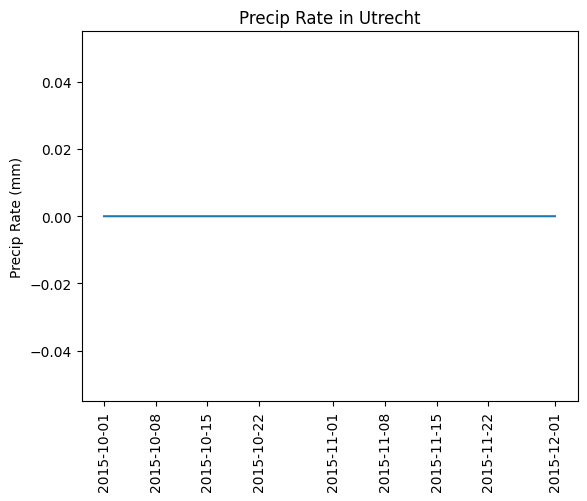

In [34]:
# Display Temperature_C


plt.plot(df.index, df["Precip_Rate_mm"])
plt.ylabel("Precip Rate (mm)")
plt.title("Precip Rate in Utrecht")
# Rotate xticks
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Display Temperature_C


plt.plot(df.index, df["Dew_Point_C"])
plt.ylabel("Dew Point (C)")
plt.title("Dew Point in Utrecht")
# Rotate xticks
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Display Temperature_C


plt.plot(df.index, df["Temperature_C"])
plt.ylabel("Temperature (C)")
plt.title("Temperature in Utrecht")
# Rotate xticks
plt.xticks(rotation=90)
plt.show()